1. This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('C:\\Users\\sapni\\Downloads\\iNeuron\\Assignments\\titanic-train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
s = round((data['Sex'].value_counts())/len(data)*100,2)
pd.DataFrame(s)

,Sex
male,64.76
female,35.24


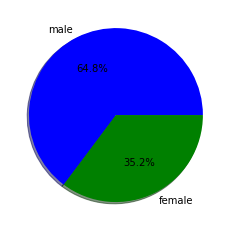

In [3]:
labels = ['male','female']
sizes = data.Sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, colors = ['Blue','Green'])
plt.show()

<Figure size 432x288 with 0 Axes>

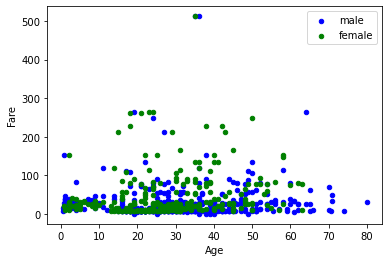

In [4]:
plt.figure()
cat1 = data[data.Sex=='male'].plot.scatter('Age','Fare',color='blue',label='male')
data[data.Sex=='female'].plot.scatter('Age','Fare',color='green',label='female',ax=cat1)

2. Problem Statement

It happens all the time: someone gives you data containing malformed strings,
Python, lists and missing data. How do you tidy it up so you can get on with the
analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:


df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


1. Some values in the the FlightNumber column are missing. These numbers are
meant to increase by 10 with each row so 10055 and 10075 need to be put in
place. Fill in these missing numbers and make the column an integer column
(instead of a float column).

In [6]:
df['FlightNumber']

0    10045.0
1        NaN
2    10065.0
3        NaN
4    10085.0
Name: FlightNumber, dtype: float64

In [7]:
new_index = np.arange(1,df.From_To.count()+1)
new_index
df.set_index(new_index, inplace=True)
df

,From_To,FlightNumber,RecentDelays,Airline
1,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
2,MAdrid_miLAN,NaN,[],(12)
3,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
4,Budapest_PaRis,NaN,[13],12. Air France
5,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [8]:
for i in np.arange(1,df.From_To.count()+1):
    if pd.isnull(df.FlightNumber.loc[i,]):
        df.loc[i,'FlightNumber']=df.FlightNumber.loc[i-1,]+10
df

,From_To,FlightNumber,RecentDelays,Airline
1,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
2,MAdrid_miLAN,10055.0,[],(12)
3,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
4,Budapest_PaRis,10075.0,[13],12. Air France
5,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [9]:
df['FlightNumber'] = df['FlightNumber'].astype(int)

In [10]:
df['FlightNumber'].dtype

dtype('int32')

2. The From_To column would be better as two separate columns! Split each
string on the underscore delimiter _ to give a new temporary DataFrame with
the correct values. Assign the correct column names to this temporary
DataFrame.

In [11]:
df['From_To']

1        LoNDon_paris
2        MAdrid_miLAN
3    londON_StockhOlm
4      Budapest_PaRis
5     Brussels_londOn
Name: From_To, dtype: object

In [12]:
df1 = df.copy()
df1[['From','To']] = df1.From_To.str.split('_',expand=True)
df1

,From_To,FlightNumber,RecentDelays,Airline,From,To
1,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
2,MAdrid_miLAN,10055,[],(12),MAdrid,miLAN
3,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
4,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
5,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)

In [13]:
df1.From = df1.From.str.capitalize()
df1.To = df1.To.str.capitalize()
df1.From_To = df1.From_To.str.capitalize()
print(df1)

            From_To  FlightNumber  RecentDelays              Airline  \
1      London_paris         10045      [23, 47]               KLM(!)   
2      Madrid_milan         10055            []                 (12)   
3  London_stockholm         10065  [24, 43, 87]  (British Airways. )   
4    Budapest_paris         10075          [13]       12. Air France   
5   Brussels_london         10085      [67, 32]          "Swiss Air"   

       From         To  
1    London      Paris  
2    Madrid      Milan  
3    London  Stockholm  
4  Budapest      Paris  
5  Brussels     London  


4. Delete the From_To column from df and attach the temporary DataFrame
from the previous questions.

In [14]:
df.drop('From_To',axis=1, inplace = True)
df

,FlightNumber,RecentDelays,Airline
1,10045,"[23, 47]",KLM(!)
2,10055,[],(12)
3,10065,"[24, 43, 87]",(British Airways. )
4,10075,[13],12. Air France
5,10085,"[67, 32]","""Swiss Air"""


5. In the RecentDelays column, the values have been entered into the
DataFrame as a list. We would like each first value in its own column, each
second value in its own column, and so on. If there isn't an Nth value, the value
should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns
delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.

In [16]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

rows = []
_ = df.apply(lambda row:[rows.append([row['Airline'],row['FlightNumber'],nn,row['From_To']]) for nn in row.RecentDelays],axis=1)
rows

[['KLM(!)', 10045.0, 23, 'LoNDon_paris'],
 ['KLM(!)', 10045.0, 47, 'LoNDon_paris'],
 ['(British Airways. )', 10065.0, 24, 'londON_StockhOlm'],
 ['(British Airways. )', 10065.0, 43, 'londON_StockhOlm'],
 ['(British Airways. )', 10065.0, 87, 'londON_StockhOlm'],
 ['12. Air France', nan, 13, 'Budapest_PaRis'],
 ['"Swiss Air"', 10085.0, 67, 'Brussels_londOn'],
 ['"Swiss Air"', 10085.0, 32, 'Brussels_londOn']]

In [17]:
df2 = pd.DataFrame(rows,columns=df.columns)
df2

,From_To,FlightNumber,RecentDelays,Airline
0,KLM(!),10045.0,23,LoNDon_paris
1,KLM(!),10045.0,47,LoNDon_paris
2,(British Airways. ),10065.0,24,londON_StockhOlm
3,(British Airways. ),10065.0,43,londON_StockhOlm
4,(British Airways. ),10065.0,87,londON_StockhOlm
5,12. Air France,NaN,13,Budapest_PaRis
6,"""Swiss Air""",10085.0,67,Brussels_londOn
7,"""Swiss Air""",10085.0,32,Brussels_londOn


In [18]:
df3 = pd.DataFrame(df['RecentDelays'].values.tolist())
df3

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [19]:
length_cols = df3.shape[1]
col_list = []
col_dict = {}
for i in range(length_cols):
    Key = df3.columns[i]
    Value = 'Delay' + str(i+1)
    col_dict[Key] = Value
col_dict

{0: 'Delay1', 1: 'Delay2', 2: 'Delay3'}

In [20]:
df3.rename(columns=col_dict,inplace=True)
df3

,Delay1,Delay2,Delay3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [21]:
df[['Delay1','Delay2','Delay3']] = df3[['Delay1','Delay2','Delay3']]
df.drop('RecentDelays',axis=1,inplace=True)
df

,From_To,FlightNumber,Airline,Delay1,Delay2,Delay3
0,LoNDon_paris,10045.0,KLM(!),23.0,47.0,NaN
1,MAdrid_miLAN,NaN,(12),NaN,NaN,NaN
2,londON_StockhOlm,10065.0,(British Airways. ),24.0,43.0,87.0
3,Budapest_PaRis,NaN,12. Air France,13.0,NaN,NaN
4,Brussels_londOn,10085.0,"""Swiss Air""",67.0,32.0,NaN
